In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('talk')

In [154]:
#   Load data
df = pd.read_csv("sim_data_full_with_costs.csv")

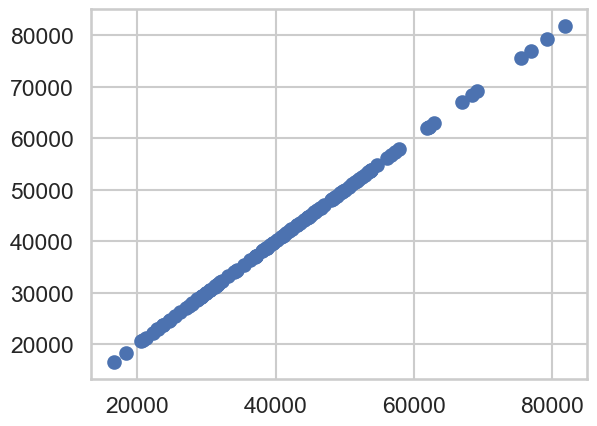

In [155]:
plt.scatter(df["cost_mean"], df["cost_mean_IPTsc_only"])

In [7]:
print(list(df.columns))

['archetype', 'baseline_transmission_metric', 'transmission_level', 'scenario_number', 'iptsc_rdts_used', 'iptsc_drugs_used_school', 'cases_treated', 'severe_cases_treated', 'received_smc_u5', 'received_smc_5-10', 'received_smc_10-15', 'received_ivermectin', 'received_primaquine', 'pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all', 'clinical_incidence0_5', 'clinical_incidence2_10', 'clinical_incidence6_15', 'clinical_incidence16_500', 'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10', 'severe_incidence6_15', 'severe_incidence16_500', 'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500', 'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases', 'Run_Number', 'iptsc_rdts_used_STDEV', 'iptsc_drugs_used_school_STDEV', 'cases_treated_STDEV', 'severe_cases_treated_STDEV', 'received_smc_u5_STDEV', 'received_smc_5-10_STDEV', 'received_smc_10-15_STDEV', 'received_ivermectin_STDEV', 'received_primaquine_STDEV', 'pfpr0_5_STDEV', 'pfpr2_1

In [11]:
# Make transmission_level float, and scenario_number int
df["transmission_level"] = df["transmission_level"].astype(float)
df["scenario_number"] = df["scenario_number"].astype(int)

In [12]:
# For each archetype, transmission level, and scenario, list costs
df.groupby(['archetype', 'transmission_level', 'scenario_number']).agg({'cost_mean': 'mean'})

cost_mean
archetype transmission_level scenario_number              
Central   0.05               0                27031.887200
                             5                22857.808200
                             6                28766.915150
                             7                31208.777314
                             8                31526.941450
...                                                    ...
Southern  0.40               5                45606.658200
                             6                48089.007050
                             7                52904.679763
                             8                49984.523200
                             9                81781.865650

[115 rows x 1 columns]

In [13]:
# Let's start with a single archetype and transmission level for simplicity
df_single = df[(df['archetype'] == 'Southern') & (df['transmission_level'] == 0.05)]

<Axes: xlabel='scenario_number', ylabel='cost_mean'>

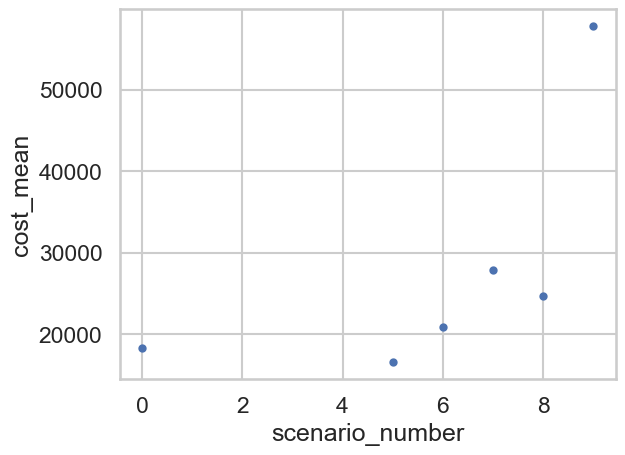

In [15]:
df_single[["scenario_number", "cost_mean"]].plot(x="scenario_number", y="cost_mean", kind="scatter")

In [19]:
df_single[["scenario_number", "comments"]]

,scenario_number,comments
85,0,No IPTsc
86,5,No IPTsc - higher ITN
87,6,ASAQ term
88,7,ASAQ month
89,8,DP term
90,9,DP month


In [23]:
# Complicated by the fact of multiple drugs and multiple campaign frequencies. Let's try to break this down further by selecting scenario numbers 0, 6, and 7
df_single_single = df_single[df_single['scenario_number'].isin([0, 6, 7])]

In [24]:
df_single_single

,archetype,baseline_transmission_metric,transmission_level,scenario_number,iptsc_rdts_used,iptsc_drugs_used_school,cases_treated,severe_cases_treated,received_smc_u5,received_smc_5-10,...,cost_severe,cost_ITNs,cost_ivermectin,cost_primaquine,cost_low,cost_high,cost_mean,cost_low_IPTsc_only,cost_high_IPTsc_only,cost_mean_IPTsc_only
85,Southern,pfpr,0.05,0,0.0,0.00,1804.91,0.0,0.0,0.0,...,0.0,3500,0.0,0.0,11658.1932,25014.5272,18336.36020,11658.1932,25014.5272,18336.36020
87,Southern,pfpr,0.05,6,0.0,4870.52,1572.41,0.0,0.0,0.0,...,0.0,3500,0.0,0.0,13480.9000,28282.5720,20881.73600,13480.9000,28282.5720,20881.73600
88,Southern,pfpr,0.05,7,0.0,19378.12,894.68,0.0,0.0,0.0,...,0.0,3500,0.0,0.0,17669.0213,38193.4544,27931.23785,17669.0213,38193.4544,27931.23785


<Axes: xlabel='scenario_number', ylabel='cost_mean'>

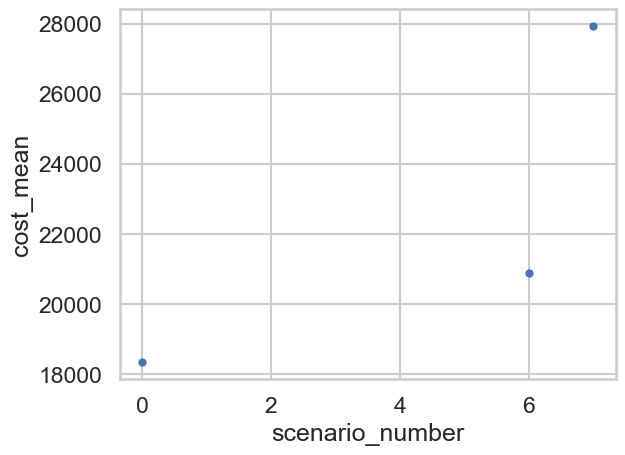

In [25]:
df_single_single[["scenario_number", "cost_mean"]].plot(x="scenario_number", y="cost_mean", kind="scatter")

In [26]:
list(df_single_single.columns)

['archetype',
 'baseline_transmission_metric',
 'transmission_level',
 'scenario_number',
 'iptsc_rdts_used',
 'iptsc_drugs_used_school',
 'cases_treated',
 'severe_cases_treated',
 'received_smc_u5',
 'received_smc_5-10',
 'received_smc_10-15',
 'received_ivermectin',
 'received_primaquine',
 'pfpr0_5',
 'pfpr2_10',
 'pfpr6_15',
 'pfpr16_500',
 'pfpr_all',
 'clinical_incidence0_5',
 'clinical_incidence2_10',
 'clinical_incidence6_15',
 'clinical_incidence16_500',
 'clinical_incidence_all',
 'severe_incidence0_5',
 'severe_incidence2_10',
 'severe_incidence6_15',
 'severe_incidence16_500',
 'severe_incidence_all',
 'pop0_5',
 'pop2_10',
 'pop6_15',
 'pop16_500',
 'pop_all',
 'avg_age',
 'avg_age_clinical_cases',
 'avg_age_severe_cases',
 'Run_Number',
 'iptsc_rdts_used_STDEV',
 'iptsc_drugs_used_school_STDEV',
 'cases_treated_STDEV',
 'severe_cases_treated_STDEV',
 'received_smc_u5_STDEV',
 'received_smc_5-10_STDEV',
 'received_smc_10-15_STDEV',
 'received_ivermectin_STDEV',
 'received

In [27]:
df_single_single[["scenario_number", "comments", "clinical_incidence_all", "severe_incidence_all"]]

,scenario_number,comments,clinical_incidence_all,severe_incidence_all
85,0,No IPTsc,0.663489,0.001536
87,6,ASAQ term,0.586508,0.001216
88,7,ASAQ month,0.323017,0.000514


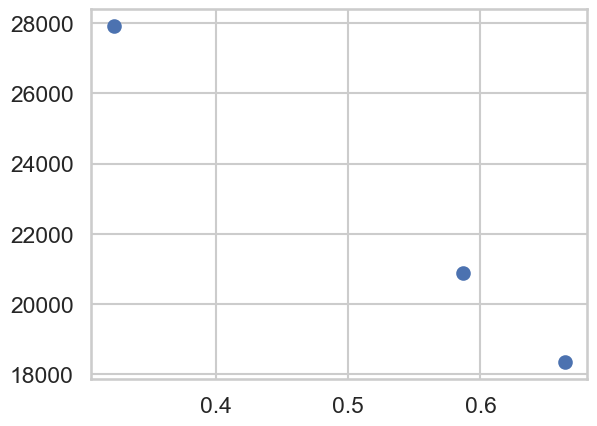

In [28]:
plt.scatter(df_single_single["clinical_incidence_all"], df_single_single["cost_mean"])

In [34]:
df_single_single[["scenario_number", "comments", "cost_low", "cost_mean", "cost_high",
                  "cost_IPTsc_low", "cost_IPTsc_mean", "cost_IPTsc_high",]]

,scenario_number,comments,cost_low,cost_mean,cost_high,cost_IPTsc_low,cost_IPTsc_mean,cost_IPTsc_high
85,0,No IPTsc,11658.1932,18336.36020,25014.5272,0.0000,0.00000,0.0000
87,6,ASAQ term,13480.9000,20881.73600,28282.5720,2873.6068,4456.52580,6039.4448
88,7,ASAQ month,17669.0213,27931.23785,38193.4544,10125.0677,17076.96825,24028.8688


In [39]:
# total costs of scenario 6 compared to scenario 0:
print(20881.73600-18336.36020)
print(28282.5720-11658.1932)
print(13480.9000-25014.5272)

2545.3758000000016
16624.3788
-11533.6272


In [42]:
# total costs of scenario 7 compared to scenario 6:
print(27931.23785-20881.73600)
print(38193.4544-13480.9000)
print(17669.0213-28282.5720)

7049.501850000001
24712.5544
-10613.5507


In [43]:
# implementation costs of scenario 7 compared to scenario 6:
print(17076.96825-4456.52580)
print(24028.8688-2873.6068)
print(10125.0677-6039.4448)

12620.442450000002
21155.262
4085.6228999999994


In [47]:
foo = df_single_single[["scenario_number", "comments", "raw_averted_clinical__all", "raw_averted_clinical__all_STDEV"]]
foo["cases_averted"] = foo["raw_averted_clinical__all"] * 10000
foo["cases_averted_STDEV"] = foo["raw_averted_clinical__all_STDEV"] * 10000
foo

C:\Users\joshsu\AppData\Local\Temp\ipykernel_23936\981953922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo["cases_averted"] = foo["raw_averted_clinical__all"] * 10000
C:\Users\joshsu\AppData\Local\Temp\ipykernel_23936\981953922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo["cases_averted_STDEV"] = foo["raw_averted_clinical__all_STDEV"] * 10000


,scenario_number,comments,raw_averted_clinical__all,raw_averted_clinical__all_STDEV,cases_averted,cases_averted_STDEV
85,0,No IPTsc,0.000000,0.047581,0.000000,475.810807
87,6,ASAQ term,0.076981,0.072299,769.811923,722.990381
88,7,ASAQ month,0.340472,0.089740,3404.715044,897.399373


In [48]:
print(769.811923-722.990381)
print(769.811923+722.990381)

46.82154200000002
1492.8023039999998


In [50]:
print(2545.38/769.8)
print(16624.38/46.8)

3.3065471551052226
355.22179487179494


In [51]:
print(3404.715044-897.399373)
print(3404.715044+897.399373)

2507.3156710000003
4302.114417


In [54]:
# Incremental cases averted for scenario 7 compared to scenario 6
print(3404.715044-769.811923)
print(3404.715044+897.399373-(769.811923-722.990381))
print(3404.715044-897.399373-(769.811923+722.990381))

2634.9031210000003
4255.292875
1014.5133670000005


In [59]:
# Cost per case averted for scenario 7 compared to baseline
print((27931.24-18336.36)/3404.7)
print((38193.45-11658.19)/2507.3)

2.8181278820454083
10.583201052925455


In [61]:
# Incremental cost per case averted for scenario 7 compared to scenario 6
print(7049.50/2634.9)
print(24712.55/1014.5)

2.675433602793275
24.359339576145885


In [64]:
# Now look at DP options
df_single_2 = df_single[df_single['scenario_number'].isin([0, 8,9])]

In [65]:
df_single_2[["scenario_number", "comments", "cost_low", "cost_mean", "cost_high",
                  "cost_IPTsc_low", "cost_IPTsc_mean", "cost_IPTsc_high",]]

,scenario_number,comments,cost_low,cost_mean,cost_high,cost_IPTsc_low,cost_IPTsc_mean,cost_IPTsc_high
85,0,No IPTsc,11658.19320,18336.360200,25014.5272,0.00000,0.000000,0.0000
89,8,DP term,19198.91850,24749.445250,30299.9720,10849.99810,12431.275850,14012.5536
90,9,DP month,48410.44915,57816.624575,67222.8000,41914.05075,48867.422175,55820.7936


In [67]:
# Incremental cost to implement scenario 9
print(48867.422175-12431.275850)
print(55820.7936-10849.99810)
print(41914.05075-14012.5536)

36436.146325
44970.79549999999
27901.497150000003


In [71]:
# Incremental cost of scenario 8
print(24749.445250-18336.360200)
print(30299.9720-11658.19320)
print(19198.91850-25014.52720)

6413.0850500000015
18641.7788
-5815.608700000001


In [72]:
# Incremental cost of scenario 9
print(57816.624575-24749.445250)
print(67222.8000-19198.91850)
print(48410.44915-30299.9720)

33067.179325000005
48023.8815
18110.47715


In [73]:
foo = df_single_2[["scenario_number", "comments", "raw_averted_clinical__all", "raw_averted_clinical__all_STDEV"]]
foo["cases_averted"] = foo["raw_averted_clinical__all"] * 10000
foo["cases_averted_STDEV"] = foo["raw_averted_clinical__all_STDEV"] * 10000
foo

C:\Users\joshsu\AppData\Local\Temp\ipykernel_23936\2162941479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo["cases_averted"] = foo["raw_averted_clinical__all"] * 10000
C:\Users\joshsu\AppData\Local\Temp\ipykernel_23936\2162941479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo["cases_averted_STDEV"] = foo["raw_averted_clinical__all_STDEV"] * 10000


,scenario_number,comments,raw_averted_clinical__all,raw_averted_clinical__all_STDEV,cases_averted,cases_averted_STDEV
85,0,No IPTsc,0.000000,0.047581,0.000000,475.810807
89,8,DP term,0.280440,0.087295,2804.404357,872.947242
90,9,DP month,0.446438,0.076443,4464.377139,764.426800


In [74]:
print(2804.404357-872.947242)
print(2804.404357+872.947242)

1931.457115
3677.3515989999996


In [75]:
print(4464.377139-764.426800)
print(4464.377139+764.426800)

3699.950339
5228.803939


In [76]:
# Incremental cases averted for scenario 9 compared to scenario 8
print(4464.377139-2804.404357)
print(4464.377139+764.426800-(2804.404357+872.947242))
print(4464.377139-764.426800-(2804.404357+872.947242))

1659.9727820000003
1551.4523400000007
22.59874000000036


In [77]:
# cost per case averted for scenario 8 compared to baseline
print((24749.45-18336.36)/2804.4)
print((30299.97-11658.19)/1931.5)
print((19198.92-25014.53)/872.9)

2.286795749536443
9.651452239192336
-6.662401191430863


In [81]:
# cost per case averted for scenario 9 compared to baseline
print((57816.62-18336.36)/4464.4)
print((67222.80-11658.19)/3760.0)
print((48410.45-25014.53)/5228.8)

8.843351850192636
14.77782180851064
4.474433904528763


In [80]:
# Incremental cost per case averted for scenario 9 compared to scenario 8
print(33067.18/1659.0)
print(48023.88/22.6)
print(18110.48/1551.5)

19.931995177817964
2124.9504424778756
11.672884305510795


In [82]:
2545.38/769.8

3.3065471551052226

In [83]:
(24749.45-20881.74)/(2804.4-769.8)

1.9009682492873285

In [ ]:
def incremental_analysis(df, comparator_scenario_number=0):
    scenario_numbers = df["scenario_number"].unique()
    
    baseline_cost_mean = df[df["scenario_number"] == 0]["cost_mean"].values[0]
    baseline_cost_low = df[df["scenario_number"] == 0]["cost_low"].values[0]
    baseline_cost_high = df[df["scenario_number"] == 0]["cost_high"].values[0]
    
    for s in scenario_numbers:
        if s == 0:
            continue
        
        
        
    
    implementation_cost_low = 
    # Cost to implement
    df[""]
    cost_implementation = df["cost_mean"].values

# Are there any dominated strategies?
Dominated means that there is another strategy that is both cheaper and more effective.


<Axes: xlabel='cost_mean', ylabel='clinical_incidence_all'>

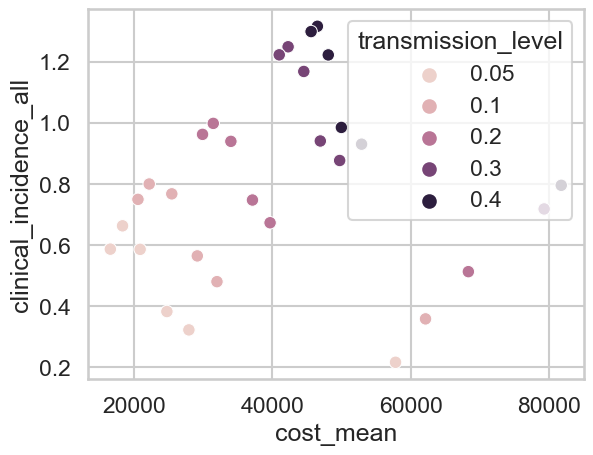

In [85]:
# Let's look at the cost-effectiveness plane
archetype = "Southern"
# Color by transmission level 
sns.scatterplot(x="cost_mean", y="clinical_incidence_all", hue="transmission_level", data=df[df["archetype"] == archetype])

# League table

In [123]:
def generate_league_table(df):
    # df: dataframe for single archetype and single transmission level
    # rows are scenarios ordered by descending cases
    # columns are cases, costs, incremental costs, incremental cases, cost-effectiveness ratio
    
    # Set index to scenario number
    df = df.set_index("scenario_number")
    
    # Sort by descending cases
    df = df.sort_values("clinical_incidence_all", ascending=False)
    df["n_cases_mean"] = df["clinical_incidence_all"] * 10000
    df["n_cases_low"] = (df["clinical_incidence_all"] - df["clinical_incidence_all_STDEV"]) * 10000
    df["n_cases_high"] = (df["clinical_incidence_all"] + df["clinical_incidence_all_STDEV"]) * 10000
    
    df = df[["comments", "n_cases_low", "n_cases_mean", "n_cases_high", "cost_low", "cost_mean", "cost_high"]]
    
    df["incremental_cost_low"] = df["cost_low"] - df["cost_high"].shift(1)
    df["incremental_cost_mean"] = df["cost_mean"].diff()
    df["incremental_cost_high"] = df["cost_high"] - df["cost_low"].shift(1)
    
    df["incremental_cases_averted_low"] = df["n_cases_low"].shift(1)-df["n_cases_high"]
    df["incremental_cases_averted_mean"] = -df["n_cases_mean"].diff()
    df["incremental_cases_averted_high"] = df["n_cases_high"].shift(1)-df["n_cases_low"]
    
    df["icer_low"] = df["incremental_cost_low"] / df["incremental_cases_averted_high"]
    df["icer_mean"] = df["incremental_cost_mean"] / df["incremental_cases_averted_mean"]
    df["icer_high"] = df["incremental_cost_high"] / df["incremental_cases_averted_low"]
    
    return df

In [193]:
# Choose 1 archetype, 1 transmission level, and exclude scenario 5
df_single = df[(df['archetype'] == 'Southern') & (df['transmission_level'] == 0.05) & (df['scenario_number'] != 5)]
 
generate_league_table(df_single)

,comments,n_cases_low,n_cases_mean,n_cases_high,cost_low,cost_mean,cost_high,incremental_cost_low,incremental_cost_mean,incremental_cost_high,incremental_cases_averted_low,incremental_cases_averted_mean,incremental_cases_averted_high,icer_low,icer_mean,icer_high
scenario_number,,,,,,,,,,,,,,,,
0,No IPTsc,6159.076428,6634.887235,7110.698041,11658.19320,18336.360200,25014.5272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ASAQ term,5142.084931,5865.075312,6588.065692,13480.90000,20881.736000,28282.5720,-11533.62720,2545.375800,16624.3788,-428.989264,769.811923,1968.613110,-5.858758,3.306490,-38.752436
8,DP term,2957.535635,3830.482877,4703.430119,19198.91850,24749.445250,30299.9720,-9083.65350,3867.709250,16819.0720,438.654812,2034.592434,3630.530057,-2.502019,1.900975,38.342386
7,ASAQ month,2332.772818,3230.172191,4127.571564,17669.02130,27931.237850,38193.4544,-12630.95070,3181.792600,18994.5359,-1170.035928,600.310687,2370.657301,-5.328037,5.300243,-16.234148
9,DP month,1406.083296,2170.510096,2934.936896,48410.44915,57816.624575,67222.8000,10216.99475,29885.386725,49553.7787,-602.164078,1059.662095,2721.488268,3.754194,28.202751,-82.292818


In [126]:
bar = generate_league_table(df_single)

# Round to 2 decimal places
bar = bar.round(2)

bar.to_csv("sample_league_table.csv", index=False)

In [107]:
6588.065692-6159.076428

428.9892639999998

In [100]:
13480.90000-25014.5272

-11533.6272

In [196]:
def generate_league_table_v2(df):
    # df: dataframe for single archetype and single transmission level
    # rows are scenarios ordered by descending cases
    # columns are cases, costs, incremental costs, incremental cases, cost-effectiveness ratio
    
    # Set index to scenario number
    df = df.set_index("scenario_number")
    
    # Sort by descending cases
    df = df.sort_values("clinical_incidence_all", ascending=False)
    df["n_cases_mean"] = df["clinical_incidence_all"] * 10000
    df["n_cases_low"] = (df["clinical_incidence_all"] - df["clinical_incidence_all_STDEV"]) * 10000
    df["n_cases_high"] = (df["clinical_incidence_all"] + df["clinical_incidence_all_STDEV"]) * 10000
    df["n_cases_std"] = df["clinical_incidence_all_STDEV"] * 10000
    
    df = df[["comments", "n_cases_low", "n_cases_mean", "n_cases_high", "n_cases_std", "cost_low", "cost_mean", "cost_high"]]
    
    df["incremental_cost_low"] = df["cost_low"] - df["cost_high"].shift(1)
    df["incremental_cost_mean"] = df["cost_mean"].diff()
    df["incremental_cost_high"] = df["cost_high"] - df["cost_low"].shift(1)
    
    incremental_cases_averted_stdev = np.sqrt(df["n_cases_std"]**2 + df["n_cases_std"].shift(1)**2)
    # df["incremental_cases_averted_low"] = df["n_cases_low"].shift(1)-df["n_cases_high"]
    df["incremental_cases_averted_mean"] = -df["n_cases_mean"].diff()
    df["incremental_cases_averted_low"] = df["incremental_cases_averted_mean"] - incremental_cases_averted_stdev
    df["incremental_cases_averted_high"] = df["incremental_cases_averted_mean"] + incremental_cases_averted_stdev
    # df["incremental_cases_averted_high"] = df["n_cases_high"].shift(1)-df["n_cases_low"]
    
    df["icer_low"] = df["incremental_cost_low"] / df["incremental_cases_averted_high"]
    df["icer_mean"] = df["incremental_cost_mean"] / df["incremental_cases_averted_mean"]
    df["icer_high"] = df["incremental_cost_high"] / df["incremental_cases_averted_low"]
    
    return df

In [197]:
bar = generate_league_table_v2(df_single)

# Round to 2 decimal places
bar = bar.round(2)

# bar.to_csv("sample_league_table.csv", index=False)

In [195]:
bar

,comments,n_cases_low,n_cases_mean,n_cases_high,n_cases_std,cost_low,cost_mean,cost_high,incremental_cost_low,incremental_cost_mean,incremental_cost_high,incremental_cases_averted_low,incremental_cases_averted_mean,incremental_cases_averted_high,incremental_cases_averted_STDEV,icer_low,icer_mean,icer_high
scenario_number,,,,,,,,,,,,,,,,,,
0,No IPTsc,6159.08,6634.89,7110.70,475.81,11658.19,18336.36,25014.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ASAQ term,5142.08,5865.08,6588.07,722.99,13480.90,20881.74,28282.57,-11533.63,2545.38,16624.38,-428.99,769.81,1968.61,865.51,-5.86,3.31,-38.75
8,DP term,2957.54,3830.48,4703.43,872.95,19198.92,24749.45,30299.97,-9083.65,3867.71,16819.07,438.65,2034.59,3630.53,1133.47,-2.50,1.90,38.34
7,ASAQ month,2332.77,3230.17,4127.57,897.40,17669.02,27931.24,38193.45,-12630.95,3181.79,18994.54,-1170.04,600.31,2370.66,1251.94,-5.33,5.30,-16.23
9,DP month,1406.08,2170.51,2934.94,764.43,48410.45,57816.62,67222.80,10216.99,29885.39,49553.78,-602.16,1059.66,2721.49,1178.84,3.75,28.20,-82.29


# Try to plot cost plane for both perspectives
For 20% PfPR
Left column: funder perspective
Right column: health system perspective
Rows: archetypes

In [162]:
df_plot = df[df["transmission_level"] == 0.2]
df_plot["cases_averted_raw"] = (df_plot["clinical_incidence_all_BASELINE"] - df_plot["clinical_incidence_all"]) * 10000
df_plot["cases_raw"] = df_plot["clinical_incidence_all"] * 10000

C:\Users\joshsu\AppData\Local\Temp\ipykernel_23936\1345548969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["cases_averted_raw"] = (df_plot["clinical_incidence_all_BASELINE"] - df_plot["clinical_incidence_all"]) * 10000
C:\Users\joshsu\AppData\Local\Temp\ipykernel_23936\1345548969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["cases_raw"] = df_plot["clinical_incidence_all"] * 10000


In [159]:
list(df_plot.columns)

['archetype',
 'baseline_transmission_metric',
 'transmission_level',
 'scenario_number',
 'iptsc_rdts_used',
 'iptsc_drugs_used_school',
 'cases_treated',
 'severe_cases_treated',
 'received_smc_u5',
 'received_smc_5-10',
 'received_smc_10-15',
 'received_ivermectin',
 'received_primaquine',
 'pfpr0_5',
 'pfpr2_10',
 'pfpr6_15',
 'pfpr16_500',
 'pfpr_all',
 'clinical_incidence0_5',
 'clinical_incidence2_10',
 'clinical_incidence6_15',
 'clinical_incidence16_500',
 'clinical_incidence_all',
 'severe_incidence0_5',
 'severe_incidence2_10',
 'severe_incidence6_15',
 'severe_incidence16_500',
 'severe_incidence_all',
 'pop0_5',
 'pop2_10',
 'pop6_15',
 'pop16_500',
 'pop_all',
 'avg_age',
 'avg_age_clinical_cases',
 'avg_age_severe_cases',
 'Run_Number',
 'iptsc_rdts_used_STDEV',
 'iptsc_drugs_used_school_STDEV',
 'cases_treated_STDEV',
 'severe_cases_treated_STDEV',
 'received_smc_u5_STDEV',
 'received_smc_5-10_STDEV',
 'received_smc_10-15_STDEV',
 'received_ivermectin_STDEV',
 'received

In [173]:
foo = df[df["archetype"] == "Sahel"]
foo[["scenario_number", "comments", "cost_mean", "cost_mean_IPTsc_only"]]

,scenario_number,comments,cost_mean,cost_mean_IPTsc_only
30,0,No IPTsc,22957.077500,22957.077500
31,5,No IPTsc - higher ITN,21247.186950,21247.186950
32,6,SPAQ term,24531.165050,24531.165050
33,7,SPAQ month,28564.108475,28564.108475
34,8,DP term,30463.726550,30463.726550
35,9,DP month,53825.116175,53825.116175
36,23,DP term - 60% in school,23657.711600,23657.711600
37,30,u10 SMC - SPAQ,26156.195675,26156.195675
38,31,u15 SMC - SPAQ,28672.715300,28672.715300
39,32,u10 SMC - DP,31701.305475,31701.305475


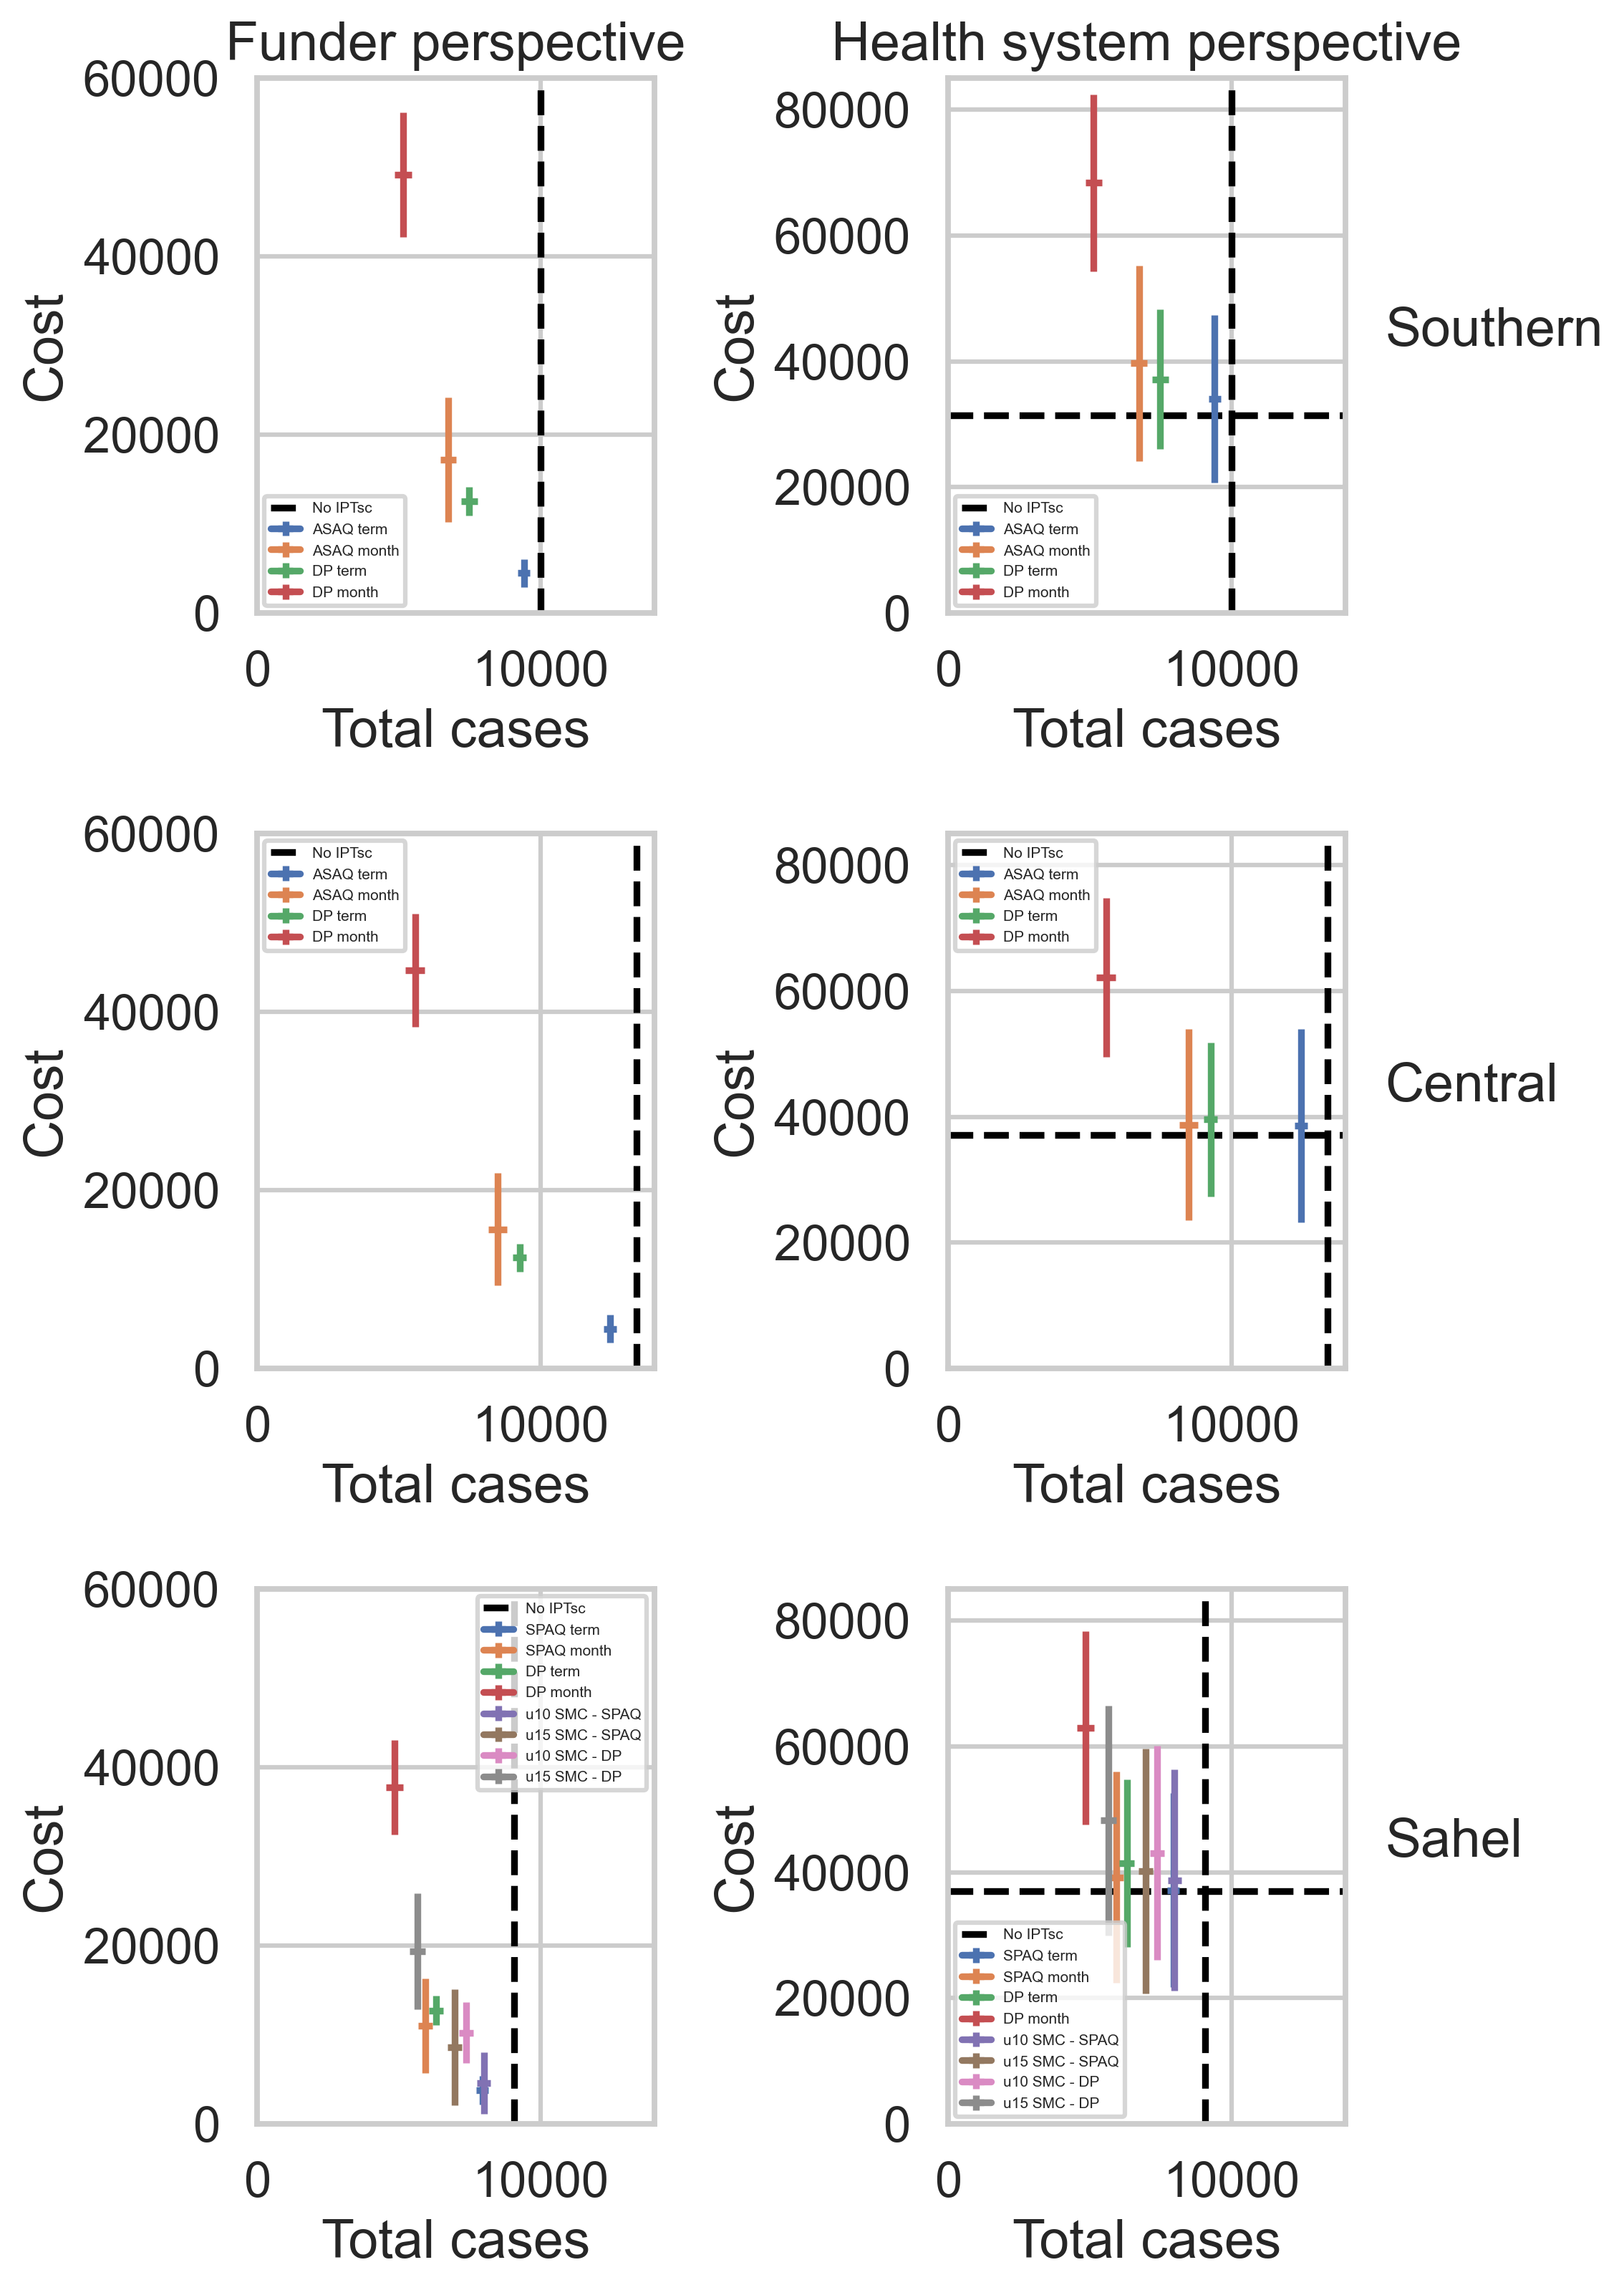

In [181]:
archetype_list = ["Southern", "Central", "Sahel"]

scenarios_to_plot = {"Southern": [0, 6, 7, 8, 9], 
                     "Central": [0, 6, 7, 8, 9], 
                     "Sahel": [0, 6, 7, 8, 9, 30, 31, 32, 33]}

plt.figure(figsize=(8,11), dpi=300)
for i in np.arange(3):
    # print(i)
    archetype = archetype_list[i]
    df_single = df_plot[df_plot['archetype'] == archetype]
    
    # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    for j in [0,1]:
        plt.subplot(3, 2, i*2+j+1)

        if j == 0:
            # Funder perspective
            # Iterate over scenarios
            for s, sdf in df_single.groupby("scenario_number"):
                if s not in scenarios_to_plot[archetype]:
                    continue
                l = sdf["comments"].values[0]
                yerr = [sdf["cost_IPTsc_mean"]-sdf["cost_IPTsc_low"], sdf["cost_IPTsc_high"]-sdf["cost_IPTsc_mean"]]
                # yerr[0:] = sdf_without_no_iptsc["cost_mean"]-sdf_without_no_iptsc["cost_low_IPTsc_only"]
                # yerr[1:] = sdf_without_no_iptsc["cost_high_IPTsc_only"]-sdf_without_no_iptsc["cost_mean"]
                if s == 0:
                    plt.axvline(x=sdf["clinical_incidence_all"].values[0]*10000, color='black', linestyle='--', label="No IPTsc")
                else:
                    plt.errorbar(x=sdf["clinical_incidence_all"]*10000,
                                 y=sdf["cost_IPTsc_mean"],
                                 # xerr=sdf["frac_averted_clinical__all_STDEV"]*100,
                                 xerr=sdf["clinical_incidence_all_STDEV"]*10000,
                                 yerr=yerr,
                                 label=l)
                if i == 0:
                    plt.title("Funder perspective")
                plt.xlabel("Total cases")
                plt.ylabel("Cost")
                plt.xlim([0,14000])
                plt.ylim([0,60000])
                
            plt.legend(fontsize=5)
            
        elif j == 1:
            # Health system perspective
            for s, sdf in df_single.groupby("scenario_number"):
                if s not in scenarios_to_plot[archetype]:
                    continue
                l = sdf["comments"].values[0]
                yerr = [sdf["cost_mean"]-sdf["cost_low"], sdf["cost_high"]-sdf["cost_mean"]]
                # yerr[0:] = sdf_without_no_iptsc["cost_mean"]-sdf_without_no_iptsc["cost_low_IPTsc_only"]
                # yerr[1:] = sdf_without_no_iptsc["cost_high_IPTsc_only"]-sdf_without_no_iptsc["cost_mean"]
                if s == 0:
                    plt.axvline(x=sdf["clinical_incidence_all"].values[0]*10000, color='black', linestyle='--', label="No IPTsc")
                    plt.axhline(y=sdf["cost_mean"].values[0], color='black', linestyle='--')
                else:
                    plt.errorbar(x=sdf["clinical_incidence_all"]*10000,
                                 y=sdf["cost_mean"],
                                 xerr=sdf["clinical_incidence_all_STDEV"]*10000,
                                 yerr=yerr,
                                 label=l)
                if i == 0:
                    plt.title("Health system perspective")
                plt.xlabel("Total cases")
                plt.ylabel("Cost")
            plt.xlim([0,14000])
            plt.ylim([0,85000])
                
            plt.legend(fontsize=5)
            
            plt.text(14000*1.1,85000/2,archetype)
        
    
        # sns.scatterplot(x="cost_mean", y="clinical_incidence_all", hue="scenario_number", data=df_single, ax=ax[0])
        # sns.scatterplot(x="cost_mean", y="clinical_incidence_all", hue="scenario_number", data=df_single, ax=ax[1])
        # 
        # ax[0].set_title("Funder perspective")
        # ax[1].set_title("Health system perspective")
        
plt.tight_layout()
plt.savefig(f"cost_plane.png")
plt.show()

In [149]:
sdf

,archetype,baseline_transmission_metric,transmission_level,scenario_number,iptsc_rdts_used,iptsc_drugs_used_school,cases_treated,severe_cases_treated,received_smc_u5,received_smc_5-10,...,cost_severe,cost_ITNs,cost_ivermectin,cost_primaquine,cost_low,cost_high,cost_mean,cost_low_IPTsc_only,cost_high_IPTsc_only,cost_mean_IPTsc_only
62,Sahel,pfpr,0.2,33,0.0,0.0,2330.0,0.0,3725.01,0.0,...,0.0,3500,0.0,0.0,29970.2277,66485.8192,48228.02345,33108.548625,63347.498275,48228.02345


In [150]:
sdf["cost_mean"]

62    48228.02345
Name: cost_mean, dtype: float64

In [151]:
sdf["cost_mean_IPTsc_only"]

62    48228.02345
Name: cost_mean_IPTsc_only, dtype: float64

In [152]:
df_single[["scenario_number", "comments", "cost_mean", "cost_mean_IPTsc_only"]]

,scenario_number,comments,cost_mean,cost_mean_IPTsc_only
52,0,No IPTsc,36980.090900,36980.090900
53,5,No IPTsc - higher ITN,35364.027300,35364.027300
54,6,SPAQ term,37150.038425,37150.038425
55,7,SPAQ month,39207.704225,39207.704225
56,8,DP term,41481.477100,41481.477100
57,9,DP month,62911.323800,62911.323800
58,23,DP term - 60% in school,38193.334300,38193.334300
59,30,u10 SMC - SPAQ,38715.198800,38715.198800
60,31,u15 SMC - SPAQ,40202.861600,40202.861600
61,32,u10 SMC - DP,43082.357925,43082.357925
